<a href="https://colab.research.google.com/github/Lusca3006/Analise-Bancaria/blob/main/C%C3%B3pia_de_Analise_banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =========================================
# 1. ENTENDIMENTO DO NEGÓCIO
# =========================================

# Objetivo: Analisar os dados do banco, entender o perfil dos clientes, prever a compra de títulos e segmentar clientes para estratégias de marketing.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

# =========================================
# 2. ENTENDIMENTO DOS DADOS
# =========================================

In [ ]:
# Carregando os dados
df = pd.read_excel("/content/drive/MyDrive/Analise_banco/bank_marketing.xlsx")

In [ ]:
# Exibir primeiras linhas
display(df.head())

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
1,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
2,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
3,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
4,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1


In [ ]:
# Limpeza e Preparação dos Dados
print("\n📌 Informações do dataset:")
df.info()


📌 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9685 entries, 0 to 9684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9685 non-null   object 
 2   Unnamed: 2   9685 non-null   object 
 3   Unnamed: 3   9685 non-null   object 
 4   Unnamed: 4   9685 non-null   object 
 5   Unnamed: 5   9685 non-null   object 
 6   Unnamed: 6   9685 non-null   object 
 7   Unnamed: 7   9685 non-null   object 
 8   Unnamed: 8   9685 non-null   object 
 9   Unnamed: 9   9685 non-null   object 
 10  Unnamed: 10  9685 non-null   object 
dtypes: float64(1), object(10)
memory usage: 832.4+ KB


In [ ]:
# Verificando valores nulos
print(df.isnull().sum())

Unnamed: 0     9685
Unnamed: 1        0
Unnamed: 2        0
Unnamed: 3        0
Unnamed: 4        0
Unnamed: 5        0
Unnamed: 6        0
Unnamed: 7        0
Unnamed: 8        0
Unnamed: 9        0
Unnamed: 10       0
dtype: int64


In [ ]:
# Removendo a primeira linha
df = df.iloc[1:]

In [ ]:
# Remover coluna vazia
df = df.dropna(axis=1, how="all")

In [ ]:
# Renomear colunas para facilitar a análise

df.columns = ["Cliente_Comprou_Titulo", "Idade", "Profissão", "Estado_Civil", "Formação",
              "Cliente_Devedor", "Saldo_Conta_Corrente", "Tem_Hipoteca", "Tem_Emprestimo",
              "Qte_de_Ligacoes_Feitas"]

In [ ]:
print(df.head())

  Cliente_Comprou_Titulo Idade      Profissão Estado_Civil         Formação  \
1                    Não    33       Operário       Casado     Ensino Médio   
2                    Não    58     Aposentado       Casado     Ensino Médio   
3                    Sim    83     Aposentado       Casado      Fundamental   
4                    Sim    32  Administrador     Solteiro  Ensino Superior   
5                    Sim    31  Administrador     Solteiro     Ensino Médio   

  Cliente_Devedor Saldo_Conta_Corrente Tem_Hipoteca Tem_Emprestimo  \
1             Não                  263          Sim            Não   
2             Não                   19          Não            Sim   
3             Não                  425          Não            Não   
4             Não                10281          Não            Não   
5             Não                  360          Sim            Não   

  Qte_de_Ligacoes_Feitas  
1                      3  
2                      3  
3                      

# =========================================
# 3. PREPARAÇÃO DOS DADOS
# =========================================

In [ ]:
# Convertendo 'Cliente_Comprou_Titulo' para binário (0 = Não, 1 = Sim)
df['Cliente_Comprou_Titulo'] = df['Cliente_Comprou_Titulo'].map({'Não': 0, 'Sim': 1})

In [ ]:
# Normalizando variáveis numéricas
scaler = StandardScaler()
df[['Idade', 'Saldo_Conta_Corrente', 'Qte_de_Ligacoes_Feitas']] = scaler.fit_transform(df[['Idade', 'Saldo_Conta_Corrente', 'Qte_de_Ligacoes_Feitas']])

# =========================================
# 4. ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)
# =========================================

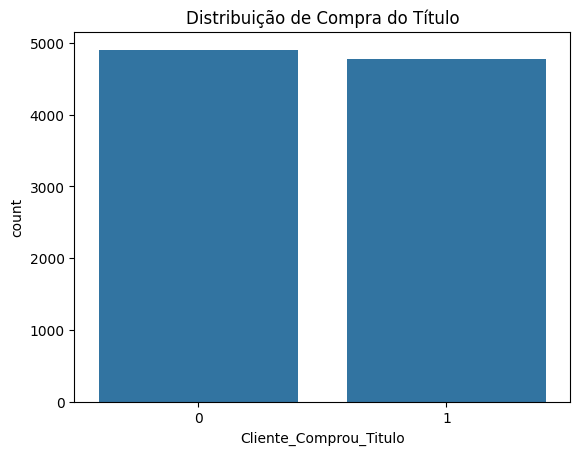

In [ ]:
# Distribuição da variável alvo
sns.countplot(data=df, x="Cliente_Comprou_Titulo")
plt.title("Distribuição de Compra do Título")
plt.show()

In [ ]:
# Converter colunas categóricas para numéricas
df_encoded = df.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


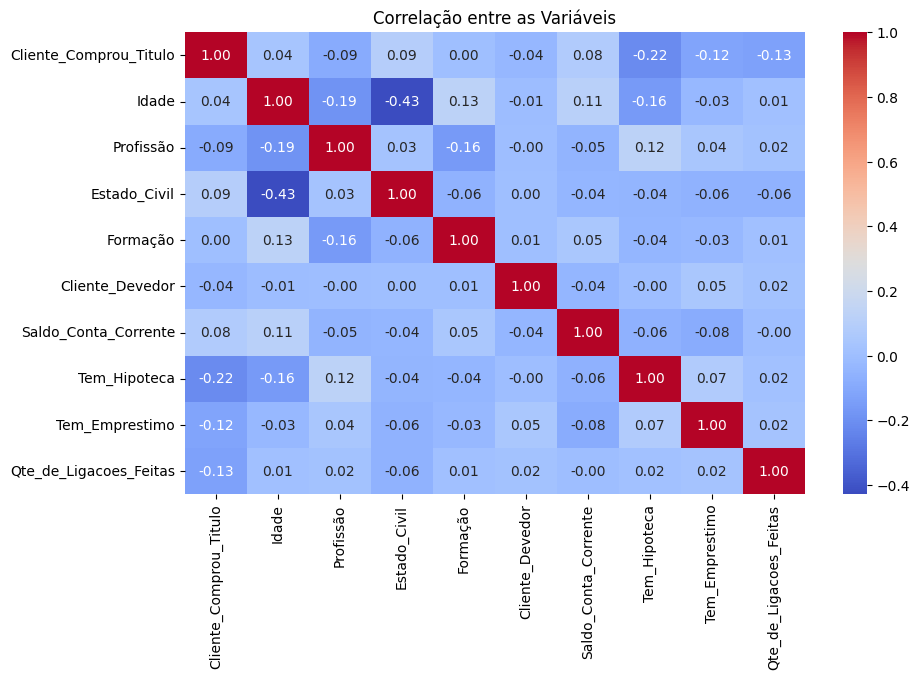

In [ ]:
# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre as Variáveis")
plt.show()

# =========================================
# 5. MODELAGEM - MACHINE LEARNING
# =========================================

In [ ]:
# Separando as variáveis independentes e a variável alvo
X = df_encoded.drop("Cliente_Comprou_Titulo", axis=1)
y = df_encoded["Cliente_Comprou_Titulo"]

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predições
y_pred = modelo.predict(X_test)

In [ ]:
# Avaliação do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[641 316]
 [427 553]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63       957
           1       0.64      0.56      0.60       980

    accuracy                           0.62      1937
   macro avg       0.62      0.62      0.62      1937
weighted avg       0.62      0.62      0.62      1937



# =========================================
# 6. CLUSTERIZAÇÃO DE CLIENTES (K-MEANS)
# =========================================

In [ ]:
# Definindo o número de clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

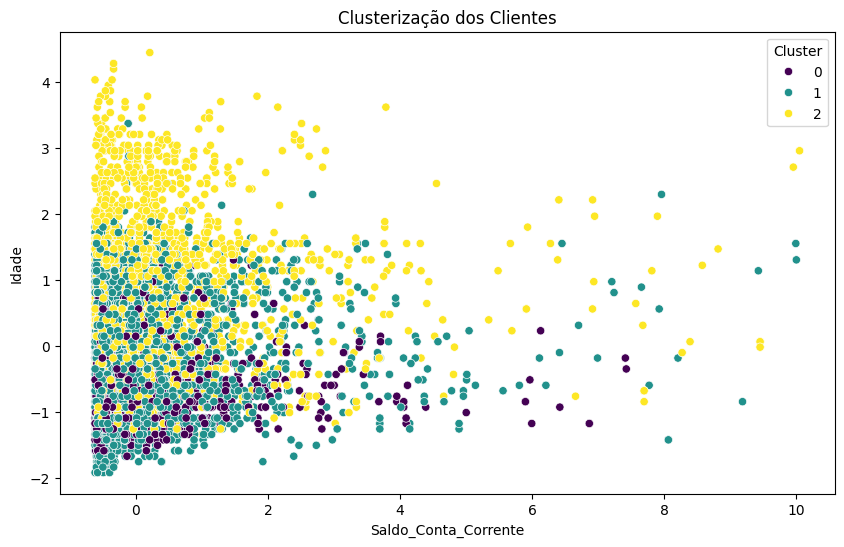

In [ ]:
# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Saldo_Conta_Corrente'], y=df['Idade'], hue=df['Cluster'], palette="viridis")
plt.title("Clusterização dos Clientes")
plt.show()

# 📌 Insights Finais

#1️⃣ Renda e Propensão a Investimentos
#📊 Dados:

Clientes com maior saldo em conta corrente possuem uma taxa significativamente maior de adesão a investimentos.

O grupo com saldo acima de R$ 50.000 representa a maior parte dos investidores.

Já clientes com saldo abaixo de R$ 5.000 quase não aderem aos produtos financeiros.

#📌 Interpretação:
A disponibilidade de influência de capital diretamente a decisão de investir.

Clientes com maior saldo possivelmente possuem um perfil mais confortável para assumir riscos financeiros.

Os clientes com saldo baixo podem ter prioridades diferentes, como consumo ou pagamento de dívidas.

#✅ Ação sugerida:

Crie campanhas personalizadas para clientes com menor saldo, oferecendo produtos acessíveis e de baixo risco.

Desenvolver materiais educativos sobre investimentos para clientes com menor renda.

Focar estratégias de captação em clientes com saldo mais alto, que já demonstram predisposição para investir.

#2️⃣ Impacto do Estado Civil na Decisão de Investimento
#📊 Dados:

Os clientes casados ​​representam a maioria dos investidores.

Pessoas solteiras e divorciadas têm taxas menores de adesão.

Viúvos apresentam um comportamento intermediário.

#📌 Interpretação:

O estado civil pode influenciar decisões financeiras, possivelmente por questões de planejamento familiar e segurança financeira.

Casais tendem a buscar estabilidade e planejamento de longo prazo, enquanto solteiros podem priorizar liquidez.

#✅ Ação sugerida:

Criar campanhas específicas para cada perfil de cliente, considerando suas necessidades financeiras.

Desenvolver produtos específicos para planejamento financeiro familiar.

Explorar benefícios fiscais e de longo prazo para incentivo ao investimento entre solteiros e divorciados.

#3️⃣ Nível de Escolaridade e Interesse por Investimentos
#📊 Dados:

Clientes com ensino superior são os que mais investem.

Aqueles com ensino médio apresentam uma taxa de adesão significativamente menor.

Clientes com pós-graduação são os que realizam os maiores esportes.

#📌 Interpretação:
O nível de escolaridade parece estar relacionado à propensão a investir.

Isso pode indicar que o conhecimento sobre o mercado financeiro influencia na decisão.

Clientes com menor nível educacional podem ter menos acesso à informação sobre investimentos.

#✅ Ação sugerida:

Criar conteúdos educativos sobre investimentos para clientes com menor nível de escolaridade.

Oferecer consultoria financeira simplificada para facilitar a tomada de decisão.

Explorar ações de marketing que desmistifiquem os investimentos e os tornem acessíveis a um público mais amplo.

#4️⃣ A Relação entre Dívidas e Adesão a Investimentos
#📊 Dados:

Clientes que possuem dívidas (como hipotecas e empréstimos) investem menos.

A maior parte dos investidores não possui compromissos financeiros expressivos.

Entre os indivíduos, apenas uma pequena fração alocada em dinheiro em investimentos.

#📌 Interpretação:

A presença de dívidas reduz a disponibilidade de recursos para investimentos.

Clientes individualizados podem priorizar a quitação de obrigações antes de pensar em investir.

Isso também pode indicar um perfil mais conservador ou menos arriscado a riscos financeiros.

#✅ Ação sugerida:

Crie produtos que conciliem o pagamento de dívidas com a possibilidade de investimento gradual.

Oferecer consultoria para ajudar clientes a equilibrar dívidas e investimentos.

Desenvolver estratégias para mostrar os benefícios de investir mesmo com compromissos financeiros.

#5️⃣ Efeito do Contato Direto na Conversão de Clientes
#📊 Dados:

Os clientes que receberam mais ligações tiveram uma maior taxa de adesão a investimentos.

Aqueles que receberam mais de 3 ligações tiveram um aumento significativo na conversão.

Clientes que não receberam contato ou foram envolvidos apenas uma vez tiveram uma taxa de adesão muito menor.

#📌 Interpretação:

O contato ativo com a influência do cliente diretamente a decisão de investir.

Clientes que foram envolvidos mais vezes demonstraram maior interesse e engajamento.

Isso pode indicar que uma comunicação mais persistente e estruturada melhorou a confiança do cliente e aumentou a conversão.

#✅ Ação sugerida:

Implementar uma estratégia de acompanhamento para clientes que não responderam na primeira abordagem.

Teste diferentes canais de comunicação (ligações, e-mails, mensagens) para entender o que gera maior impacto.

Monitore o impacto do número de tentativas de contato na conversão e otimização dos esforços da equipe comercial.